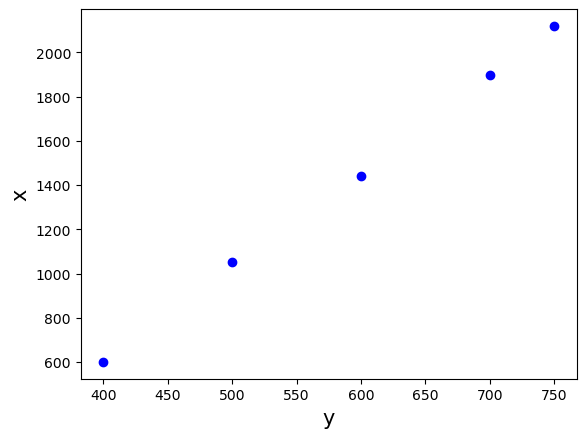

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# define os dados
x = np.array([400,500,600,700,750]) 
y = np.array([600,1050,1440,1900,2120]) 
plt.plot(x, y, 'bo')
plt.ylabel("x", fontsize = 15)
plt.xlabel("y", fontsize = 15)
plt.show(True) 


In [2]:
n = np.size(x) 
Sx= np.sum(x)
Sy=np.sum(y)
Sxy=np.sum(x*y)
Sxx=np.sum(x*x)   
a1=(n*Sxy-Sx*Sy)/(n*Sxx-Sx**2)   #Calcula o coeficiente a1 da reta
a0=(Sxx*Sy-Sxy*Sx)/(n*Sxx-Sx**2) #Calcula o coeficiente a0 da reta
print(f"A1 = {a1}")
print(f"A0 = {a0}")


A1 = 4.318292682926829
A0 = -1125.7926829268292


C:\Users\Giovanni\AppData\Local\Temp\ipykernel_18324\4160459490.py:7: RuntimeWarning: overflow encountered in scalar multiply
  a0=(Sxx*Sy-Sxy*Sx)/(n*Sxx-Sx**2) #Calcula o coeficiente a0 da reta


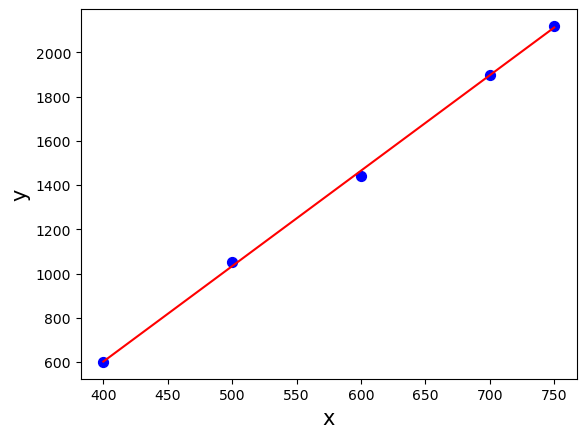

In [3]:
# mostra os dados
plt.scatter(x, y, color = "b", marker = "o", s = 50) 
  # prediz os valores
y_pred = a0 + a1*x 
    # mostra a reta de regressão
plt.plot(x, y_pred, color = "r") 
  
plt.xlabel('x', fontsize = 15) 
plt.ylabel('y', fontsize = 15) 
plt.show(True) 


In [15]:
#funcao que calcula o Residuo
def Residuo(x,y,b0,b1):
    n = len(y)
    RS = 0
    for i in range(0,n):
         y_pred=b0+b1*x[i]
         RS = RS + (y[i]-y_pred)**2
    return RS
print('Residuo:', Residuo(x,y,a0,a1))

Residuo: 972.5609756097562


In [7]:
#cria a matriz A
matriz_A=np.matrix([[n,Sx],[Sx,Sxx]])
#cria a matriz B
matriz_B=([[Sy],[Sxy],])
#calcula o determinante de A
print("%.2f" %np.linalg.det(matriz_A))
#cria a matriz inversa de A
matriz_A_inv=np.linalg.inv(matriz_A)
#Resolve o sistema linear
sol=matriz_A_inv*matriz_B
print("Resultado do sistema linear")
print(sol)


410000.00
Resultado do sistema linear
[[-1125.79268293]
 [    4.31829268]]


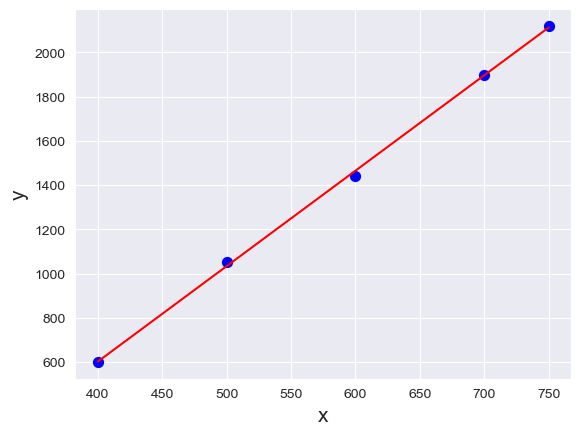

In [9]:
# mostra os dados
plt.scatter(x, y, color = "b", marker = "o", s = 50) 
a0=sol[0,0]  
a1=sol[1,0]
    # prediz os valores
y_pred = a0 + a1*x 
  
    # mostra a reta de regressão
plt.plot(x, y_pred, color = "r") 
  
plt.xlabel('x', fontsize = 15) 
plt.ylabel('y', fontsize = 15) 
plt.show(True) 


In [14]:
Correlacao_coeficiente = np.corrcoef(x,y)
print(f"Coeficiante de correlação {Correlacao_coeficiente[0][1]}")
print(f"R2 {Correlacao_coeficiente[0][1]**2}")


Coeficiante de correlação 0.9996821357146752
R2 0.9993643724670543


# Exercicio 2


In [59]:
import sympy as sy
import numpy as np
from scipy.interpolate import lagrange
from numpy.polynomial.polynomial import Polynomial
from scipy.interpolate import lagrange
x=np.array([1,7,14])      
y=np.array([10.5,17.7,35.2])
poly = lagrange(x, y)
print(f"Equação gerada pela função de lagrange => {poly}")
values = Polynomial(poly).coef
print("Coeficiente do polinomio = ",end='')
for i in values:
    print(f"{i:.2f}", end=' ')
print(f"\nResultado utilizando o poly(9) = {poly(9)}")
print(f"Resultado utilizando o interp do numpy buscando o valor na posição 9km = {np.interp(9, x, y)}")
print(f"Resultado da equação para descobrir a distancia que ele pode chegar com 24 reais= {np.roots(poly - 24)[1]}")


Equação gerada pela função de lagrange =>      2
0.1 x + 0.4 x + 10
Coeficiente do polinomio = 0.10 0.40 10.00 
Resultado utilizando o poly(9) = 21.700000000000003
Resultado utilizando o interp do numpy buscando o valor na posição 9km = 22.7
Resultado da equação para descobrir a distancia que ele pode chegar com 24 reais= 10.0


In [60]:
poly = np.polyfit(x,y,2)
for i in poly:
    print(f"{i:.2f}", end=' ')
print()
p = np.poly1d(poly)
print(f"Utilizando a função polyfit temos o resultado para 9km igual a {p(9)}")
print(np.roots(poly-24))

0.10 0.40 10.00 
Utilizando a função polyfit temos o resultado para 9km igual a 21.700000000000003
[-0.49372385+0.58481691j -0.49372385-0.58481691j]


# Exercicio 3


In [65]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn import datasets

df = pd.read_csv('mtcars.csv')
print("Número de linhas e colunas:",df.shape)
df = df.dropna()
df.head(25)

Número de linhas e colunas: (32, 12)


,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [76]:

import statsmodels.formula.api as sm
x = df[['gear','qsec','cyl']]
# X = np.array(x).reshape(-1, 1)
y = df['hp']
modelo = LinearRegression().fit(x, y)
model = sm.ols(formula="hp ~ gear+qsec+cyl-1", data=df)
result = model.fit()
print(result.summary())


                            OLS Regression Results                            
Dep. Variable:                     hp   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     37.82
Date:                Wed, 16 Oct 2024   Prob (F-statistic):           5.54e-10
Time:                        20:21:55   Log-Likelihood:                -154.27
No. Observations:                  32   AIC:                             316.5
Df Residuals:                      28   BIC:                             322.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -127.6725    176.405     -0.724      0.4